In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # To visualize

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [2]:
csv_path = "clean_auto.csv"
df = pd.read_csv(csv_path)
df.head()

symboling  normalized-losses         make num-of-doors   body-style  \
0          3                122  alfa-romero          two  convertible   
1          3                122  alfa-romero          two  convertible   
2          1                122  alfa-romero          two    hatchback   
3          2                164         audi         four        sedan   
4          2                164         audi         four        sedan   

  drive-wheels engine-location  wheel-base    length     width  ...  peak-rpm  \
0          rwd           front        88.6  0.811148  0.890278  ...    5000.0   
1          rwd           front        88.6  0.811148  0.890278  ...    5000.0   
2          rwd           front        94.5  0.822681  0.909722  ...    5000.0   
3          fwd           front        99.8  0.848630  0.919444  ...    5500.0   
4          4wd           front        99.4  0.848630  0.922222  ...    5500.0   

   city-mpg highway-mpg    price  city-L/100km horsepower-binned  \
0        21          27  13495.0     11.190476               Low   
1        21          27  16500.0     11.190476               Low   
2        19          26  16500.0     12.368421            Medium   
3        24          30  13950.0      9.791667               Low   
4        18          22  17450.0     13.055556               Low   

   fuel-type-diesel  fuel-type-diesel.1  aspiration-std  aspiration-turbo  
0                 0                   1               1                 0  
1                 0                   1               1                 0  
2                 0                   1               1                 0  
3                 0                   1               1                 0  
4                 0                   1               1                 0  

[5 rows x 30 columns]

In [3]:
df.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  201.000000          201.00000  201.000000  201.000000  201.000000   
mean     0.840796          122.00000   98.797015    0.837102    0.915126   
std      1.254802           31.99625    6.066366    0.059213    0.029187   
min     -2.000000           65.00000   86.600000    0.678039    0.837500   
25%      0.000000          101.00000   94.500000    0.801538    0.890278   
50%      1.000000          122.00000   97.000000    0.832292    0.909722   
75%      2.000000          137.00000  102.400000    0.881788    0.925000   
max      3.000000          256.00000  120.900000    1.000000    1.000000   

           height  curb-weight  engine-size        bore      stroke  ...  \
count  201.000000   201.000000   201.000000  201.000000  201.000000  ...   
mean    53.766667  2555.666667   126.875622    3.330692    3.256874  ...   
std      2.447822   517.296727    41.546834    0.268072    0.316048  ...   
min     47.800000  1488.000000    61.000000    2.540000    2.070000  ...   
25%     52.000000  2169.000000    98.000000    3.150000    3.110000  ...   
50%     54.100000  2414.000000   120.000000    3.310000    3.290000  ...   
75%     55.500000  2926.000000   141.000000    3.580000    3.410000  ...   
max     59.800000  4066.000000   326.000000    3.940000    4.170000  ...   

       horsepower     peak-rpm    city-mpg  highway-mpg         price  \
count  201.000000   201.000000  201.000000   201.000000    201.000000   
mean   103.402985  5117.665368   25.179104    30.686567  13207.129353   
std     37.365650   478.113805    6.423220     6.815150   7947.066342   
min     48.000000  4150.000000   13.000000    16.000000   5118.000000   
25%     70.000000  4800.000000   19.000000    25.000000   7775.000000   
50%     95.000000  5125.369458   24.000000    30.000000  10295.000000   
75%    116.000000  5500.000000   30.000000    34.000000  16500.000000   
max    262.000000  6600.000000   49.000000    54.000000  45400.000000   

       city-L/100km  fuel-type-diesel  fuel-type-diesel.1  aspiration-std  \
count    201.000000        201.000000          201.000000      201.000000   
mean       9.944145          0.099502            0.900498        0.820896   
std        2.534599          0.300083            0.300083        0.384397   
min        4.795918          0.000000            0.000000        0.000000   
25%        7.833333          0.000000            1.000000        1.000000   
50%        9.791667          0.000000            1.000000        1.000000   
75%       12.368421          0.000000            1.000000        1.000000   
max       18.076923          1.000000            1.000000        1.000000   

       aspiration-turbo  
count        201.000000  
mean           0.179104  
std            0.384397  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000  

[8 rows x 21 columns]

In [4]:
df.dtypes

symboling               int64
normalized-losses       int64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
horsepower-binned      object
fuel-type-diesel        int64
fuel-type-diesel.1      int64
aspiration-std          int64
aspiration-turbo        int64
dtype: object

In [5]:
df_price = df.groupby(['price'])

In [6]:
df_price.describe()

symboling                                   normalized-losses         \
            count mean std  min  25%  50%  75%  max             count   mean   
price                                                                          
5118.0        1.0  2.0 NaN  2.0  2.0  2.0  2.0  2.0               1.0   83.0   
5151.0        1.0  2.0 NaN  2.0  2.0  2.0  2.0  2.0               1.0  121.0   
5195.0        1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0               1.0  104.0   
5348.0        1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0               1.0   87.0   
5389.0        1.0  2.0 NaN  2.0  2.0  2.0  2.0  2.0               1.0  161.0   
...           ...  ...  ..  ...  ...  ...  ...  ...               ...    ...   
36880.0       1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0               1.0  122.0   
37028.0       1.0  3.0 NaN  3.0  3.0  3.0  3.0  3.0               1.0  122.0   
40960.0       1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0               1.0  122.0   
41315.0       1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0               1.0  122.0   
45400.0       1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0               1.0  122.0   

         ... aspiration-std      aspiration-turbo                          \
         ...            75%  max            count mean std  min  25%  50%   
price    ...                                                                
5118.0   ...            1.0  1.0              1.0  0.0 NaN  0.0  0.0  0.0   
5151.0   ...            1.0  1.0              1.0  0.0 NaN  0.0  0.0  0.0   
5195.0   ...            1.0  1.0              1.0  0.0 NaN  0.0  0.0  0.0   
5348.0   ...            1.0  1.0              1.0  0.0 NaN  0.0  0.0  0.0   
5389.0   ...            1.0  1.0              1.0  0.0 NaN  0.0  0.0  0.0   
...      ...            ...  ...              ...  ...  ..  ...  ...  ...   
36880.0  ...            1.0  1.0              1.0  0.0 NaN  0.0  0.0  0.0   
37028.0  ...            1.0  1.0              1.0  0.0 NaN  0.0  0.0  0.0   
40960.0  ...            1.0  1.0              1.0  0.0 NaN  0.0  0.0  0.0   
41315.0  ...            1.0  1.0              1.0  0.0 NaN  0.0  0.0  0.0   
45400.0  ...            1.0  1.0              1.0  0.0 NaN  0.0  0.0  0.0   

                   
         75%  max  
price              
5118.0   0.0  0.0  
5151.0   0.0  0.0  
5195.0   0.0  0.0  
5348.0   0.0  0.0  
5389.0   0.0  0.0  
...      ...  ...  
36880.0  0.0  0.0  
37028.0  0.0  0.0  
40960.0  0.0  0.0  
41315.0  0.0  0.0  
45400.0  0.0  0.0  

[186 rows x 160 columns]

In [7]:
df["price"].head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [8]:
df["price"].replace(np.nan, -1, inplace=True)
df["price"]=df["price"].astype(int, copy=True)
df["price"].replace(-1, np.nan, inplace=True)

In [9]:
#membagi celas 'price' , menjadi menjadi 2 bagian yaotui 'LOW' dan 'HIGH'

In [10]:
bins = np.linspace(min(df["price"]), max(df["price"]),3)
bins

array([ 5118., 25259., 45400.])

In [11]:
group_names = ['Low','High']

In [12]:
df['price-binned-L2'] = pd.cut(df['price'], bins, labels=group_names, include_lowest=True )
df[['price','price-binned-L2']].head(20)

price price-binned-L2
0   13495             Low
1   16500             Low
2   16500             Low
3   13950             Low
4   17450             Low
5   15250             Low
6   17710             Low
7   18920             Low
8   23875             Low
9   16430             Low
10  16925             Low
11  20970             Low
12  21105             Low
13  24565             Low
14  30760            High
15  41315            High
16  36880            High
17   5151             Low
18   6295             Low
19   6575             Low

In [13]:
#membagi celas 'price' , menjadi menjadi 3 bagian yaotui 'LOW', 'MEDIUM' dan 'HIGH'

In [14]:
bins = np.linspace(min(df["price"]), max(df["price"]),4)
bins

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [15]:
group_names = ['Low','Medium','High']

In [16]:
df['price-binned-L3'] = pd.cut(df['price'], bins, labels=group_names, include_lowest=True )
df[['price','price-binned-L3']].head(20)

price price-binned-L3
0   13495             Low
1   16500             Low
2   16500             Low
3   13950             Low
4   17450             Low
5   15250             Low
6   17710             Low
7   18920          Medium
8   23875          Medium
9   16430             Low
10  16925             Low
11  20970          Medium
12  21105          Medium
13  24565          Medium
14  30760          Medium
15  41315            High
16  36880            High
17   5151             Low
18   6295             Low
19   6575             Low

In [17]:
#membagi celas 'price' , menjadi menjadi 5 bagian yaotui 'LOW', 'MEDIUM' dan 'HIGH'

In [18]:
bins = np.linspace(min(df["price"]), max(df["price"]),6)
bins

array([ 5118. , 13174.4, 21230.8, 29287.2, 37343.6, 45400. ])

In [19]:
group_names = ['Low','Low-Medium','Medium','Medium-High','High']

In [20]:
df['price-binned-L5'] = pd.cut(df['price'], bins, labels=group_names, include_lowest=True )
df[['price','price-binned-L5']].head(20)

price price-binned-L5
0   13495      Low-Medium
1   16500      Low-Medium
2   16500      Low-Medium
3   13950      Low-Medium
4   17450      Low-Medium
5   15250      Low-Medium
6   17710      Low-Medium
7   18920      Low-Medium
8   23875          Medium
9   16430      Low-Medium
10  16925      Low-Medium
11  20970      Low-Medium
12  21105      Low-Medium
13  24565          Medium
14  30760     Medium-High
15  41315            High
16  36880     Medium-High
17   5151             Low
18   6295             Low
19   6575             Low

In [21]:
#Perbandingan nilai value

In [22]:
df["price-binned-L5"].value_counts()

Low            126
Low-Medium      52
Medium-High     11
Medium           9
High             3
Name: price-binned-L5, dtype: int64

In [23]:
df["price-binned-L3"].value_counts()

Low       171
Medium     18
High       12
Name: price-binned-L3, dtype: int64

In [24]:
df["price-binned-L2"].value_counts()

Low     184
High     17
Name: price-binned-L2, dtype: int64

In [25]:
#menggunakan REGRESI

In [26]:
df[["normalized-losses","price"]].corr()

normalized-losses     price
normalized-losses           1.000000  0.133999
price                       0.133999  1.000000

In [27]:
X = df[['price']]
Y = df['normalized-losses']

In [28]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
Yhat=lm.predict(X)
Yhat[0:5]

array([122.15530675, 123.7765098 , 123.7765098 , 122.40078009,
       124.28903655])

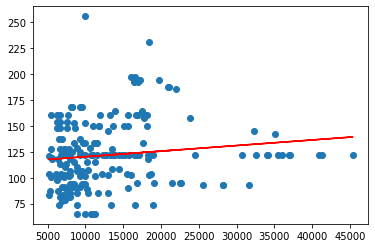

In [30]:
plt.scatter(X, Y)
plt.plot(X, Yhat, color='red')
plt.show()

In [31]:
#menggunakan clustering

In [32]:
data = df[["normalized-losses","price"]].to_numpy()

In [33]:
#menggunakan dataL5, dataL3 dan dataL2 untuk mempisahkan 'price-binned'

In [34]:
dataL5= df[['normalized-losses','price','price-binned-L5']]
dataL5

normalized-losses  price price-binned-L5
0                  122  13495      Low-Medium
1                  122  16500      Low-Medium
2                  122  16500      Low-Medium
3                  164  13950      Low-Medium
4                  164  17450      Low-Medium
..                 ...    ...             ...
196                 95  16845      Low-Medium
197                 95  19045      Low-Medium
198                 95  21485          Medium
199                 95  22470          Medium
200                 95  22625          Medium

[201 rows x 3 columns]

In [35]:
dataL3= df[['normalized-losses','price','price-binned-L3',]]
dataL3

normalized-losses  price price-binned-L3
0                  122  13495             Low
1                  122  16500             Low
2                  122  16500             Low
3                  164  13950             Low
4                  164  17450             Low
..                 ...    ...             ...
196                 95  16845             Low
197                 95  19045          Medium
198                 95  21485          Medium
199                 95  22470          Medium
200                 95  22625          Medium

[201 rows x 3 columns]

In [36]:
dataL2= df[['normalized-losses','price','price-binned-L2']]
dataL2

normalized-losses  price price-binned-L2
0                  122  13495             Low
1                  122  16500             Low
2                  122  16500             Low
3                  164  13950             Low
4                  164  17450             Low
..                 ...    ...             ...
196                 95  16845             Low
197                 95  19045             Low
198                 95  21485             Low
199                 95  22470             Low
200                 95  22625             Low

[201 rows x 3 columns]

In [37]:
#Menuntukan nilai Kmeans berdasarkan level kmeansL2, kmeansL3 dan kmeansL5

In [38]:
kmeansL5 = KMeans(5)
kmeansL5.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
kmeansL3 = KMeans(3)
kmeansL3.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
kmeansL2 = KMeans(2)
kmeansL2.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
#Menentukan NIlai Array dari setiap Kmeans di masing2 level

In [42]:
DArrayL5 = kmeansL5.fit_predict(data)
DArrayL5

array([3, 4, 4, 3, 4, 4, 4, 4, 1, 4, 4, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3,
       2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 4, 0, 0, 3, 3, 3, 3, 4, 4, 1, 1,
       1, 2, 2, 2, 2, 2, 4, 0, 0, 0, 0, 3, 0, 3, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 3, 1, 2, 2, 2, 0, 3, 3, 3, 4, 4,
       4, 4, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 4, 0, 3, 3, 3, 3, 4, 4,
       4, 4, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       1, 1, 1])

In [43]:
DArrayL3 = kmeansL3.fit_predict(data)
DArrayL3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [44]:
DArrayL2 = kmeansL2.fit_predict(data)
DArrayL2

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0])

In [45]:
#Memasukan nilai data berdasarkan berdasarkan 'Clustering' yang sudah dibagi

In [46]:
data_clusteringL5 = dataL5.copy()
data_clusteringL5 ['Clustering'] = DArrayL5
data_clusteringL5

normalized-losses  price price-binned-L5  Clustering
0                  122  13495      Low-Medium           3
1                  122  16500      Low-Medium           4
2                  122  16500      Low-Medium           4
3                  164  13950      Low-Medium           3
4                  164  17450      Low-Medium           4
..                 ...    ...             ...         ...
196                 95  16845      Low-Medium           4
197                 95  19045      Low-Medium           4
198                 95  21485          Medium           1
199                 95  22470          Medium           1
200                 95  22625          Medium           1

[201 rows x 4 columns]

In [47]:
data_clusteringL3 = dataL3.copy()
data_clusteringL3 ['Clustering'] = DArrayL3
data_clusteringL3

normalized-losses  price price-binned-L3  Clustering
0                  122  13495             Low           2
1                  122  16500             Low           2
2                  122  16500             Low           2
3                  164  13950             Low           2
4                  164  17450             Low           2
..                 ...    ...             ...         ...
196                 95  16845             Low           2
197                 95  19045          Medium           2
198                 95  21485          Medium           2
199                 95  22470          Medium           2
200                 95  22625          Medium           2

[201 rows x 4 columns]

In [48]:
data_clusteringL2 = dataL2.copy()
data_clusteringL2 ['Clustering'] = DArrayL2
data_clusteringL2

normalized-losses  price price-binned-L2  Clustering
0                  122  13495             Low           1
1                  122  16500             Low           1
2                  122  16500             Low           1
3                  164  13950             Low           1
4                  164  17450             Low           1
..                 ...    ...             ...         ...
196                 95  16845             Low           1
197                 95  19045             Low           1
198                 95  21485             Low           0
199                 95  22470             Low           0
200                 95  22625             Low           0

[201 rows x 4 columns]

In [49]:
#Perbandiangan nilai data clustering di masing-masing level

In [50]:
data_clusteringL5["Clustering"].value_counts()

0    90
3    46
4    40
2    14
1    11
Name: Clustering, dtype: int64

In [51]:
data_clusteringL3["Clustering"].value_counts()

0    122
2     63
1     16
Name: Clustering, dtype: int64

In [52]:
data_clusteringL2["Clustering"].value_counts()

1    176
0     25
Name: Clustering, dtype: int64

In [53]:
data_clusteringL5.to_csv('Clustering_LOW_MEDIUM-LOW_MEDIUM_MEDIUM-HIGH_HIGH.csv', index=False)

In [54]:
data_clusteringL3.to_csv('Clustering_LOW_MEDIUM_HIGH.csv', index=False)

In [55]:
data_clusteringL2.to_csv('Clustering_LOW_HIGH.csv', index=False)

In [ ]:
#TERIMA KASIH